##Name: Ebrahim Hirani
##UID: 2018130015
##Batch: A
##Objective
###PCA


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/DS")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
## set matplotlib defaults;
plt.style.use('seaborn-whitegrid')
plt.rc(
    'figure', 
    autolayout = True
)
plt.rc(
    'axes', 
    labelsize = 'large', 
    labelweight = 'bold', 
    titlesize = 'large', 
    titleweight = 14, 
    titlepad = 10
)


This dataset contains various features of automobiles and provides the price of these vehicles as labels

In [5]:
df = pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [6]:
df = df.replace('?', np.nan)

In [7]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [8]:
df["normalized-losses"] = df["normalized-losses"].astype("float64")

We only use physical features and performance in this dataset as we would like to predict the price solely based on the features of the car . Further more these are numrical values and we can apply PCA to these.

In [9]:
df['price'] = df["price"].astype("float64")
df['horsepower'] = df["horsepower"].astype("float64")
df['peak-rpm'] = df["peak-rpm"].astype("float64")
df['bore'] = df["bore"].astype("float64")
df['stroke'] = df["stroke"].astype("float64")

In [10]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [11]:
categorical_columns = ["make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "num-of-cylinders", "fuel-system", "engine-type"]

In [12]:
df = df.drop(columns = categorical_columns)

In [13]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [14]:
df.isna().any()

symboling            False
normalized-losses     True
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-size          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

In [15]:
for index, i in zip(df.isna().any().index ,df.isna().any()):
  if i:
    med = df[index].median()
    df[index] = df[index].replace(np.nan, med)
  print(index, i)

symboling False
normalized-losses True
wheel-base False
length False
width False
height False
curb-weight False
engine-size False
bore True
stroke True
compression-ratio False
horsepower True
peak-rpm True
city-mpg False
highway-mpg False
price True


In [16]:
df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [17]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


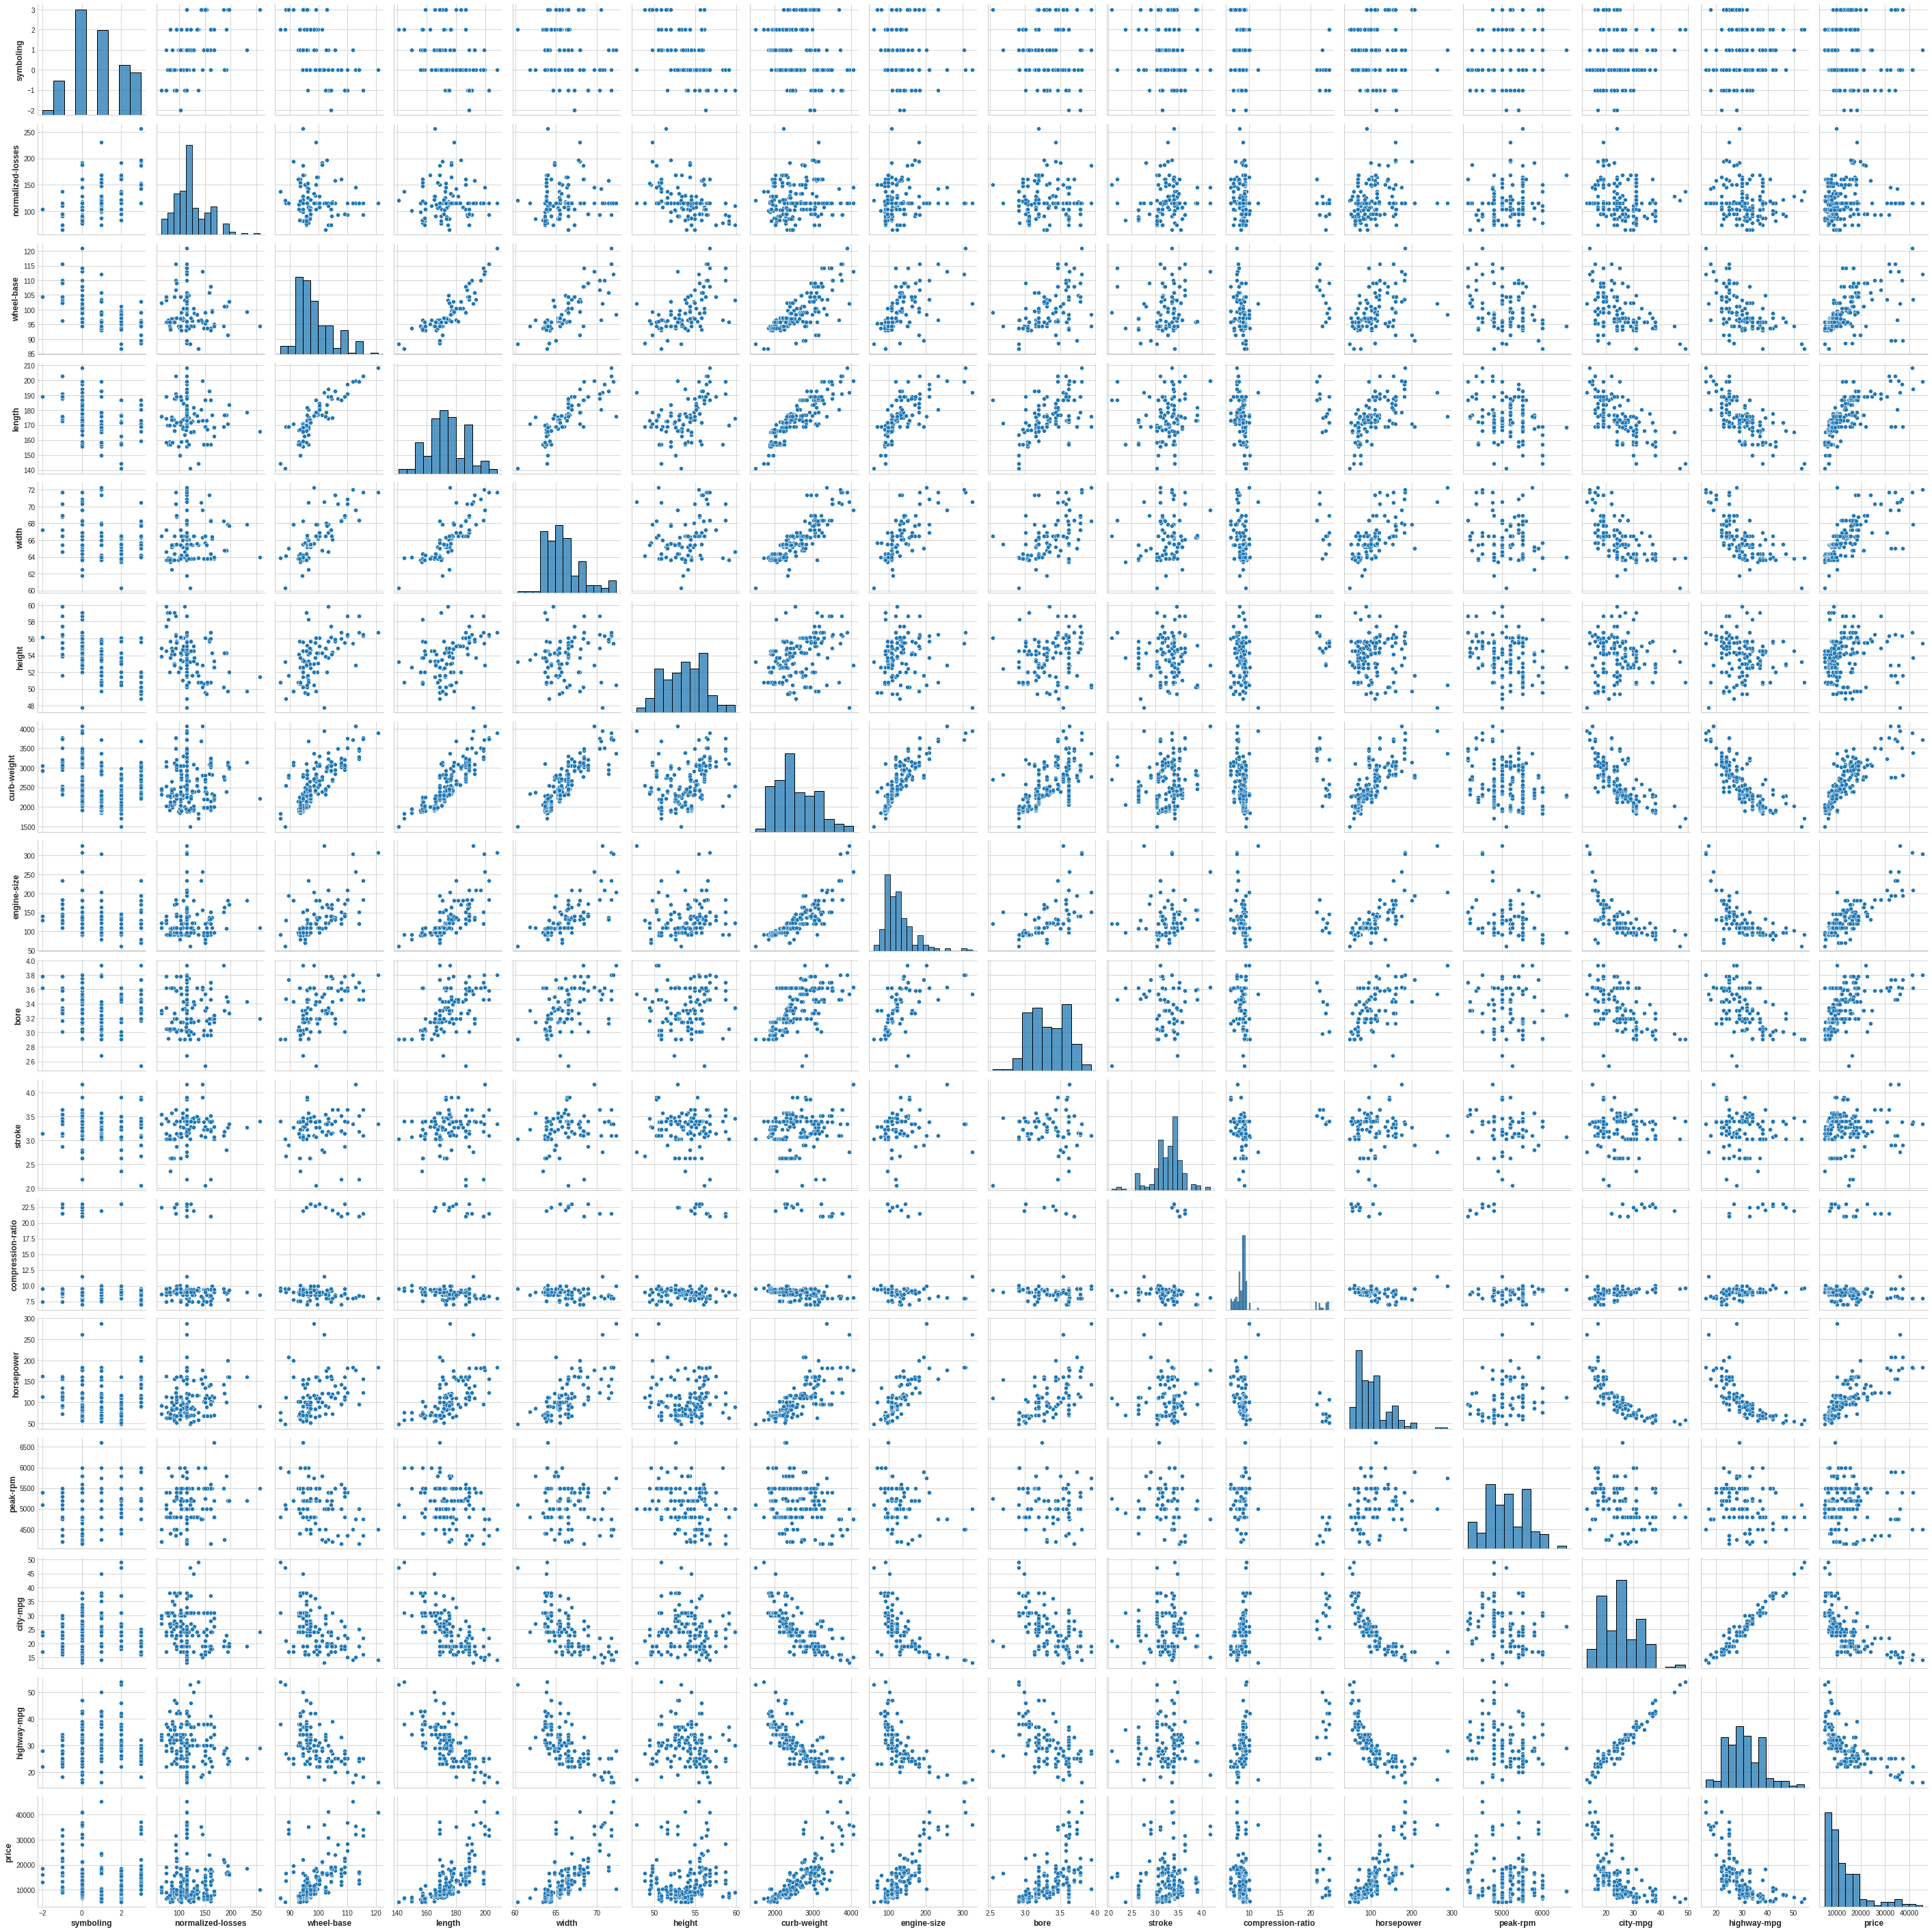

In [18]:
sns.pairplot(df)
plt.show()

This graph shows that many features like highway-mpg and city-mpg are linearly related to each other and effectively represent the same variance in the dataset

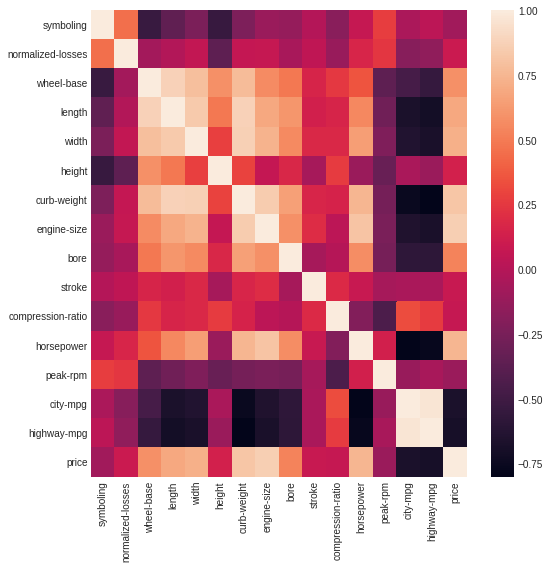

In [19]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr())

In [20]:
target = df["price"].copy()
del df["price"]

In [21]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22


In [22]:
df.dtypes

symboling              int64
normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
dtype: object

In [23]:
normalized_df=(df-df.min())/(df.max()-df.min())


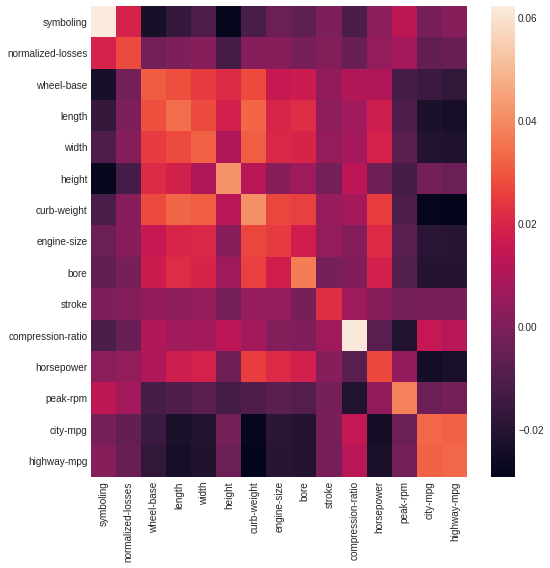

In [24]:
plt.figure(figsize=(8, 8))
sns.heatmap(normalized_df.cov())

Since there are many columns that are correlated to each other, PCA can eliminate a lot of redundancy.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_r = pca.fit_transform(X_train)
X_test_r = pca.transform(X_test)

Variances of the components:

In [40]:
pca.explained_variance_ratio_


array([0.63795621, 0.35784363])

In [27]:
train_df = pd.DataFrame({"X1" : X_train_r[:,0], "X2": X_train_r[:,1], "Y": y_train})
train_df.head()

,X1,X2,Y
66,726.987540,-622.087438,18344.0
111,485.412492,228.058639,15580.0
153,15.097551,-446.042859,6918.0
96,-479.329330,-343.709815,7499.0
38,-631.764377,317.454166,9095.0


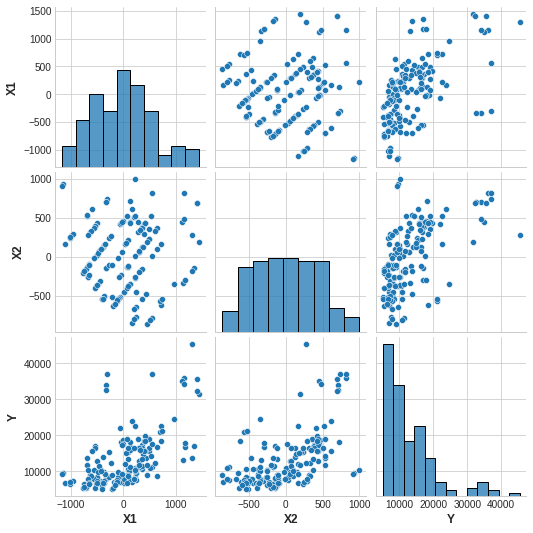

In [28]:
sns.pairplot(train_df)

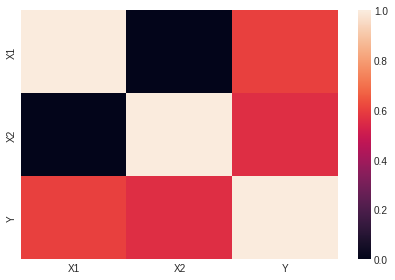

In [29]:
sns.heatmap(train_df.corr())

As we can see, the components are highly correlated to the price of the automobiles

In [38]:
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error
regr = LinearRegression()
  
regr.fit(X_train, y_train )
print("R-square score on test dataset",regr.score(X_test, y_test
                                                  ))
y_pred = regr.predict(X_test)
print("Mean Squared Error (MSE): ", round(mean_squared_error(y_test, y_pred), 5))
print("Root Mean Squared Error (RMSE): ", round(math.sqrt(mean_squared_error(y_test, y_pred)),5))


R-square score on test dataset 0.7782349030991921
Mean Squared Error (MSE):  17396010.60906
Root Mean Squared Error (RMSE):  4170.8525


In [39]:
from sklearn.linear_model import LinearRegression
regrPCA = LinearRegression()
  
regrPCA.fit(X_train_r, y_train )
print("R-square score on test dataset",regrPCA.score(X_test_r, y_test
                                                  ))
y_pred = regrPCA.predict(X_test_r)
print("Mean Squared Error (MSE): ", round(mean_squared_error(y_test, y_pred), 5))
print("Root Mean Squared Error (RMSE): ", round(math.sqrt(mean_squared_error(y_test, y_pred)),5))


R-square score on test dataset 0.7104273680968644
Mean Squared Error (MSE):  22715064.93618
Root Mean Squared Error (RMSE):  4766.03241


#Inference

* We use PCA to reduce the dimensionality of the features. The first component contains the maximum variance followed by the second component.
* The training time is significantly reduced using PCA in addition to the memory and resources required to be allocated.
* The score of the model does reduce after Dimensionality reduction. The RMSE suggests that on average, the difference between the predicted values of models is around $600
